In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from pymcdm.methods import TOPSIS

In [2]:
df = pd.read_csv("paragraphs/paragrapghs_with_topisc_2022.csv.zip", index_col=0)
df.head()

,Unnamed: 0.1,rsspp_index,index,company,paragraph,original_text,cleaned_text,year,Экология в целом,Климат,...,Устойчивое развитие_importance,Устойчивое развитие_base_words_count,cleaned_texttopics,second_max_topic_cos,second_max_score_cos,max_topic_exp,max_score_exp,second_max_topic_exp,second_max_score_exp,total_found_words
0,0,1428,1428,ЭЛ5-Энерго 2022,42,алибек айбекович тналин генеральный директор э...,алибек айбекович тналин генеральный директор у...,2022,0.0,0.0,...,0.0,0.0,алибек айбекович тналин генеральный директор у...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1428,1428,ЭЛ5-Энерго 2022,43,"в завершение хочу еще раз отметить, что данные...",завершение хотеть отметить дать достижение явл...,2022,0.0,0.0,...,2.0,2.0,завершение хотеть отметить дать достижение явл...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1428,1428,ЭЛ5-Энерго 2022,47,представляем вашему вниманию наш второй отчет ...,представлять ваш внимание наш второй отчёт уст...,2022,0.0,0.0,...,1.0,3.0,представлять ваш внимание наш второй отчёт уст...,NaN,NaN,Отчетность и прозрачность,-862.0,Риски,-902.0,26.0
3,3,1428,1428,ЭЛ5-Энерго 2022,48,наша гордость в 2022 году достижение показател...,наш гордость 2022 год достижение показатель но...,2022,0.0,0.0,...,0.0,0.0,наш гордость 2022 год достижение показатель но...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1428,1428,ЭЛ5-Энерго 2022,50,мы прилагаем большие усилия для развития и мот...,прилагать больший усилие развитие мотивация со...,2022,0.0,0.0,...,0.0,1.0,прилагать больший усилие развитие мотивация со...,NaN,NaN,Права человека,-1674.0,Экология в целом,-1866.0,57.0


In [3]:
df.loc[df["company"] == "reports/ПАО «ВЫМПЕЛКОМ» ", ["company"]] = "reports/ПАО «ВЫМПЕЛКОМ»"

In [4]:
not_nan = df[df["max_topic_exp"].notna()]
# число абзацев соотвествующих теме
reports = not_nan.groupby(["company", "index", "max_topic_exp"])["index"].count()
reports

company          index  max_topic_exp           
Lenenergo        0      Биоразнообразие              22
                        Вода                         31
                        Воздух                       14
                        Климат                       12
                        Корпоративное управление     19
                                                   ... 
ЭЛ5-Энерго 2022  1428   Права человека              175
                        Риски                       221
                        Экология в целом            122
                        Энергия                      25
                        Этика и антикоррупция        26
Name: index, Length: 254, dtype: int64

# TF-IDF

## TF

In [5]:
topics_per_report = not_nan.groupby("index")["index"].count()
topics_per_report.head(10)

index
0       591
1       608
2        99
3       516
4       571
5      1055
6       197
7       982
319    1140
505      32
Name: index, dtype: int64

In [6]:
tf = defaultdict(dict)
for (file_name, index, topic), row in reports.items():
    tf[index][topic] = row / topics_per_report[index]
tf = pd.DataFrame(tf).T

In [7]:
df["max_topic_exp"]

0                              NaN
1                              NaN
2        Отчетность и прозрачность
3                              NaN
4                   Права человека
                   ...            
14149                          NaN
14150                          NaN
14151    Отчетность и прозрачность
14152                          NaN
14153        Этика и антикоррупция
Name: max_topic_exp, Length: 14154, dtype: object

## IDF

In [8]:
idf = {}
for topic in df["max_topic_exp"].unique():
    if pd.isna(topic):
        continue
    print(tf[topic].notna())
    idf[topic] = np.log(df["index"].nunique() / tf[topic].notna().sum())
idf = pd.Series(idf)

0        True
1        True
5        True
4        True
3        True
7        True
812      True
505     False
1420     True
1421     True
1422     True
1423     True
6        True
1425     True
319      True
1120     True
1426     True
1427     True
2        True
1428     True
Name: Отчетность и прозрачность, dtype: bool
0       True
1       True
5       True
4       True
3       True
7       True
812     True
505     True
1420    True
1421    True
1422    True
1423    True
6       True
1425    True
319     True
1120    True
1426    True
1427    True
2       True
1428    True
Name: Права человека, dtype: bool
0       True
1       True
5       True
4       True
3       True
7       True
812     True
505     True
1420    True
1421    True
1422    True
1423    True
6       True
1425    True
319     True
1120    True
1426    True
1427    True
2       True
1428    True
Name: Экология в целом, dtype: bool
0        True
1        True
5        True
4        True
3        True
7        True
8

In [9]:
tf_idf = defaultdict(dict)
for idx, row in tf.iterrows():
    for topic in row.index:
        tf_idf[idx][topic] = row[topic] * idf[topic]

In [10]:
tf_idf = pd.DataFrame(tf_idf).T
tf_idf = tf_idf.fillna(0)
tf_idf.head(30)

,Биоразнообразие,Вода,Воздух,Климат,Корпоративное управление,Отношения с инвесторами,Отчетность и прозрачность,Потребители. Доступность,Потребители. Ценовая политика,Права человека,Риски,Экология в целом,Энергия,Этика и антикоррупция,Экологичность продукта
0,0.003726,0.005250,0.002371,0.002032,0.010817,0.002847,0.004572,0.002058,0.001380,0.005449,0.041320,0.006274,0.014659,0.002312,0.000000
1,0.005103,0.013004,0.002634,0.005597,0.000553,0.000000,0.001975,0.004668,0.000447,0.008265,0.026009,0.008185,0.010426,0.002728,0.000000
5,0.003510,0.007115,0.001897,0.005882,0.004465,0.003827,0.002372,0.000000,0.001289,0.007538,0.036618,0.007677,0.008613,0.002127,0.001844
4,0.005784,0.004557,0.001753,0.004557,0.000000,0.001179,0.002454,0.000000,0.000000,0.017175,0.022786,0.008203,0.006661,0.001282,0.000000
3,0.007952,0.004655,0.001940,0.005043,0.003260,0.001304,0.002521,0.001572,0.000527,0.007470,0.029482,0.008888,0.010238,0.003971,0.000000
7,0.002956,0.005096,0.001936,0.003873,0.008566,0.004112,0.002038,0.000826,0.000554,0.007204,0.039646,0.008744,0.004949,0.002584,0.000000
812,0.006490,0.003757,0.002049,0.003416,0.001148,0.001148,0.006148,0.000000,0.000928,0.014154,0.025277,0.002165,0.010097,0.006494,0.006641
505,0.006255,0.009383,0.000000,0.012510,0.010515,0.010515,0.000000,0.000000,0.000000,0.009148,0.003128,0.019821,0.000000,0.001525,0.000000
1420,0.005020,0.005647,0.002510,0.004392,0.005274,0.000000,0.000627,0.001271,0.000000,0.010706,0.029805,0.010553,0.003312,0.002447,0.000000
1421,0.000000,0.000000,0.010008,0.000000,0.000000,0.000000,0.010008,0.000000,0.000000,0.014637,0.000000,0.014637,0.000000,0.009758,0.000000


In [11]:
tf_idf.to_csv("paragraphs/tf_idf_2022.csv")

## Second

In [12]:
def second_workflow(data: pd.DataFrame):
    matrix = data.to_numpy()
    weights = np.array([1 / matrix.shape[0]] * matrix.shape[1])
    types = np.ones(matrix.shape[1], dtype=int)
    body = TOPSIS()
    predictions = [round(preference, 2) for preference in body(matrix, weights, types)]
    return predictions

In [13]:
topic_words = pd.read_csv("../topic_words.csv", index_col=0)
topic_words.head()

,topic,weight,type,word
meta,,,,
env,Экология в целом,5,0,воздействие
env,Экология в целом,5,0,окружающая среда
env,Экология в целом,5,0,природа
env,Экология в целом,5,0,природоохранный
env,Экология в целом,5,0,экологический


In [15]:
topics = topic_words.groupby("meta")["topic"].apply(set)

In [14]:
gr = tf_idf

In [16]:
gr.reset_index(inplace=True)
gr = gr.set_index("index")
gr.head(20)

,Биоразнообразие,Вода,Воздух,Климат,Корпоративное управление,Отношения с инвесторами,Отчетность и прозрачность,Потребители. Доступность,Потребители. Ценовая политика,Права человека,Риски,Экология в целом,Энергия,Этика и антикоррупция,Экологичность продукта
index,,,,,,,,,,,,,,,
0,0.003726,0.005250,0.002371,0.002032,0.010817,0.002847,0.004572,0.002058,0.001380,0.005449,0.041320,0.006274,0.014659,0.002312,0.000000
1,0.005103,0.013004,0.002634,0.005597,0.000553,0.000000,0.001975,0.004668,0.000447,0.008265,0.026009,0.008185,0.010426,0.002728,0.000000
5,0.003510,0.007115,0.001897,0.005882,0.004465,0.003827,0.002372,0.000000,0.001289,0.007538,0.036618,0.007677,0.008613,0.002127,0.001844
4,0.005784,0.004557,0.001753,0.004557,0.000000,0.001179,0.002454,0.000000,0.000000,0.017175,0.022786,0.008203,0.006661,0.001282,0.000000
3,0.007952,0.004655,0.001940,0.005043,0.003260,0.001304,0.002521,0.001572,0.000527,0.007470,0.029482,0.008888,0.010238,0.003971,0.000000
7,0.002956,0.005096,0.001936,0.003873,0.008566,0.004112,0.002038,0.000826,0.000554,0.007204,0.039646,0.008744,0.004949,0.002584,0.000000
812,0.006490,0.003757,0.002049,0.003416,0.001148,0.001148,0.006148,0.000000,0.000928,0.014154,0.025277,0.002165,0.010097,0.006494,0.006641
505,0.006255,0.009383,0.000000,0.012510,0.010515,0.010515,0.000000,0.000000,0.000000,0.009148,0.003128,0.019821,0.000000,0.001525,0.000000
1420,0.005020,0.005647,0.002510,0.004392,0.005274,0.000000,0.000627,0.001271,0.000000,0.010706,0.029805,0.010553,0.003312,0.002447,0.000000


In [17]:
bad = ["Кибербезопасность", "Инновации", "Персонал в целом"]
#gr["company"] = gr["company"].str.split("/").str[1]
for key, cur_topics in topics.items():
    tmp_topics = []
    for t in cur_topics:
        if t in gr:
            tmp_topics.append(t)
        #else:
            #tmp_topics.append("!" + t)
    cur_topics = tmp_topics
    res = second_workflow(gr[cur_topics])
    pd.Series(res).set_axis(gr.index).to_csv(f"{key}.csv")
    gr[key] = res

In [18]:
bad = ["Кибербезопасность", "Инновации", "Персонал в целом"]

tmp_topics = []
for t in [v for _, val in topics.items() for v in val]:
    if t in gr:
        tmp_topics.append(t)
    #else:
        #tmp_topics.append("!" + t)
cur_topics = tmp_topics
res = second_workflow(gr[cur_topics])
res = pd.Series(res).set_axis(gr.index)
gr["all_letters"] = res

In [19]:
gr["on_letters"] = second_workflow(gr[["env", "gov", "social"]])

In [20]:
topsis = gr[['env', 'social', 'gov','all_letters','on_letters']]

In [21]:
gr = (
    df.drop(
        columns=[
            "Unnamed: 0.1",
            "rsspp_index",
            "paragraph",
            "original_text",
            "cleaned_text",
            "max_topic_cos",
            "max_score_cos",
            "count_words",
            "second_max_topic_cos",
            "second_max_score_cos",
            "max_topic_exp",
            "max_score_exp",
            "second_max_topic_exp",
            "second_max_score_exp",
        ]
    )
    .groupby(["company", "index"])
    .mean()
    .dropna(how="all")
)
gr.head(20)

,,year,Экология в целом,Климат,Энергия,Воздух,Вода,Отходы и циклическая экономика,Биоразнообразие,Рекультивация земель,Экологичность продукта,...,Этика и антикоррупция_percent_of_words,Этика и антикоррупция_importance,Этика и антикоррупция_base_words_count,Корпоративное управление_percent_of_words,Корпоративное управление_importance,Корпоративное управление_base_words_count,Устойчивое развитие_percent_of_words,Устойчивое развитие_importance,Устойчивое развитие_base_words_count,total_found_words
company,index,,,,,,,,,,,,,,,,,,,,,
Lenenergo,0,2022.0,0.005896,0.000955,0.021891,0.003040,0.008679,0.007104,0.001268,0.005818,0.004215,...,0.011696,0.061350,0.505521,0.022792,0.435583,0.888344,0.035066,0.163190,1.337423,70.439932
Lukoil,1,2022.0,0.016065,0.026999,0.016598,0.010563,0.023675,0.019758,0.006378,0.010053,0.010021,...,0.007088,0.033792,0.237797,0.011455,0.065081,0.400501,0.044913,0.443054,1.500626,56.751645
Phosagro,5,2022.0,0.008516,0.017800,0.007430,0.006069,0.014843,0.017034,0.002885,0.004785,0.014382,...,0.010714,0.058863,0.436401,0.016153,0.178620,0.600812,0.040030,0.344384,1.368742,59.567773
Polyus,4,2022.0,0.006852,0.026228,0.010003,0.006438,0.011350,0.019987,0.008675,0.009734,0.007342,...,0.014271,0.211382,0.577236,0.014348,0.069106,0.567751,0.046711,0.621951,1.898374,71.281961
Rosseti,3,2022.0,0.012381,0.014654,0.025024,0.011939,0.013746,0.013001,0.007862,0.006671,0.005315,...,0.012540,0.039244,0.441860,0.020425,0.126453,0.734012,0.040288,0.277616,1.406977,59.804264
Tatneft,7,2022.0,0.010343,0.022238,0.010616,0.008383,0.010285,0.015228,0.006555,0.009790,0.011361,...,0.013938,0.048046,0.492671,0.030340,0.398208,1.052117,0.044872,0.430782,1.622964,65.510183
«Общероссийское отраслевое объединение работодателей электроэнергетики,812,2022.0,0.000000,0.001132,0.007808,0.000000,0.001785,0.002792,0.000000,0.002574,0.003969,...,0.007856,0.004237,0.296610,0.013821,0.014831,0.555085,0.029070,0.118644,1.095339,56.382253
АО «Калининградский янтарный комбинат,505,2022.0,0.016999,0.000000,0.002343,0.005054,0.008300,0.020204,0.003690,0.005593,0.000000,...,0.001190,0.000000,0.035714,0.008274,0.053571,0.232143,0.019962,0.160714,0.589286,40.875000
Акрон 2022,1420,2022.0,0.016815,0.013265,0.012250,0.018161,0.016011,0.017295,0.008504,0.014006,0.012634,...,0.016739,0.107417,0.560102,0.022198,0.191816,0.693095,0.050272,0.327366,1.636829,62.062696


In [22]:
gr.reset_index(inplace=True)
gr = gr.set_index("index")
gr.head()

,company,year,Экология в целом,Климат,Энергия,Воздух,Вода,Отходы и циклическая экономика,Биоразнообразие,Рекультивация земель,...,Этика и антикоррупция_percent_of_words,Этика и антикоррупция_importance,Этика и антикоррупция_base_words_count,Корпоративное управление_percent_of_words,Корпоративное управление_importance,Корпоративное управление_base_words_count,Устойчивое развитие_percent_of_words,Устойчивое развитие_importance,Устойчивое развитие_base_words_count,total_found_words
index,,,,,,,,,,,,,,,,,,,,,
0,Lenenergo,2022.0,0.005896,0.000955,0.021891,0.003040,0.008679,0.007104,0.001268,0.005818,...,0.011696,0.061350,0.505521,0.022792,0.435583,0.888344,0.035066,0.163190,1.337423,70.439932
1,Lukoil,2022.0,0.016065,0.026999,0.016598,0.010563,0.023675,0.019758,0.006378,0.010053,...,0.007088,0.033792,0.237797,0.011455,0.065081,0.400501,0.044913,0.443054,1.500626,56.751645
5,Phosagro,2022.0,0.008516,0.017800,0.007430,0.006069,0.014843,0.017034,0.002885,0.004785,...,0.010714,0.058863,0.436401,0.016153,0.178620,0.600812,0.040030,0.344384,1.368742,59.567773
4,Polyus,2022.0,0.006852,0.026228,0.010003,0.006438,0.011350,0.019987,0.008675,0.009734,...,0.014271,0.211382,0.577236,0.014348,0.069106,0.567751,0.046711,0.621951,1.898374,71.281961
3,Rosseti,2022.0,0.012381,0.014654,0.025024,0.011939,0.013746,0.013001,0.007862,0.006671,...,0.012540,0.039244,0.441860,0.020425,0.126453,0.734012,0.040288,0.277616,1.406977,59.804264


In [23]:
bad = ["Кибербезопасность", "Инновации", "Персонал в целом"]
#gr["company"] = gr["company"].str.split("/").str[1]
for key, cur_topics in topics.items():
    tmp_topics = []
    for t in cur_topics:
        if t in gr:
            tmp_topics.append(t)
        #else:
            #tmp_topics.append("!" + t)
    cur_topics = tmp_topics
    res = second_workflow(gr[cur_topics])
    pd.Series(res).set_axis(gr.index).to_csv(f"{key}.csv")
    gr[key] = res

In [24]:
bad = ["Кибербезопасность", "Инновации", "Персонал в целом"]

tmp_topics = []
for t in [v for _, val in topics.items() for v in val]:
    if t in gr:
        tmp_topics.append(t)
    #else:
        #tmp_topics.append("!" + t)
cur_topics = tmp_topics
res = second_workflow(gr[cur_topics])
res = pd.Series(res).set_axis(gr.index)
gr["all_letters"] = res

In [25]:
gr["on_letters"] = second_workflow(gr[["env", "gov", "social"]])
topsis1 = gr[['company', 'env', 'social', 'gov','all_letters','on_letters']]

In [26]:
topsis

,env,social,gov,all_letters,on_letters
index,,,,,
0,0.39,0.32,0.47,0.42,0.58
1,0.49,0.13,0.27,0.37,0.46
5,0.41,0.29,0.38,0.38,0.51
4,0.36,0.00,0.35,0.33,0.35
3,0.44,0.13,0.33,0.37,0.45
7,0.30,0.14,0.44,0.35,0.41
812,0.47,0.22,0.45,0.44,0.60
505,0.50,0.00,0.42,0.43,0.53
1420,0.35,0.02,0.33,0.32,0.32


In [27]:
topsis1

,company,env,social,gov,all_letters,on_letters
index,,,,,,
0,Lenenergo,0.32,0.31,0.54,0.37,0.59
1,Lukoil,0.62,0.37,0.37,0.43,0.67
5,Phosagro,0.46,0.34,0.48,0.39,0.65
4,Polyus,0.51,0.39,0.54,0.45,0.73
3,Rosseti,0.51,0.43,0.38,0.44,0.67
7,Tatneft,0.51,0.37,0.68,0.46,0.76
812,«Общероссийское отраслевое объединение работо...,0.15,0.37,0.10,0.30,0.38
505,АО «Калининградский янтарный комбинат,0.31,0.17,0.08,0.19,0.30
1420,Акрон 2022,0.62,0.48,0.55,0.52,0.84


In [28]:
comp = topsis1['company']
topsis['company'] = comp

In [29]:
topsis = topsis[['company', 'env', 'social', 'gov','all_letters','on_letters']]

In [30]:
topsis1.head(20)

,company,env,social,gov,all_letters,on_letters
index,,,,,,
0,Lenenergo,0.32,0.31,0.54,0.37,0.59
1,Lukoil,0.62,0.37,0.37,0.43,0.67
5,Phosagro,0.46,0.34,0.48,0.39,0.65
4,Polyus,0.51,0.39,0.54,0.45,0.73
3,Rosseti,0.51,0.43,0.38,0.44,0.67
7,Tatneft,0.51,0.37,0.68,0.46,0.76
812,«Общероссийское отраслевое объединение работо...,0.15,0.37,0.10,0.30,0.38
505,АО «Калининградский янтарный комбинат,0.31,0.17,0.08,0.19,0.30
1420,Акрон 2022,0.62,0.48,0.55,0.52,0.84


In [31]:
topsis.to_csv("results/topsis_2022.csv")

In [465]:
df = pd.read_csv("data_reports_2/res_top/topsis_2005.csv", index_col=0)

In [466]:
df

,company,year,env,social,gov,all_letters,on_letters
index,,,,,,,
45,BP p.l.c.,2005.0,0.37,0.34,0.57,0.39,0.66
828,«Общероссийское отраслевое объединение работо...,2005.0,0.18,0.33,0.14,0.28,0.34
188,АО «Альфа-банк»,2005.0,0.07,0.18,0.13,0.15,0.14
667,АО «МХК «ЕвроХим»,2005.0,0.25,0.53,0.49,0.47,0.68
1061,АО «СУЭК»,2005.0,0.27,0.42,0.51,0.42,0.65
1390,ЗАО «ЮниКредитБанк» (ЗАО «Международный Моско...,2005.0,0.04,0.25,0.25,0.22,0.27
1370,Концерн «Шелл»,2005.0,0.39,0.24,0.33,0.30,0.48
782,Ново Нордиск АС Дания,2005.0,0.06,0.21,0.27,0.20,0.27
696,ОАО «Монди Бизнес Пейпа Сыктывкарский ЛПК»,2005.0,0.03,0.22,0.05,0.18,0.13


## Topsis VS RAEX

In [73]:
import matplotlib.pyplot as plt 

In [979]:
e_e_t = [0.21, 0.37, 0.33]
e_e_r = [0.56, 0.88, 0.88]
e_s_t = [0.01, 0.06, 0.4]
e_s_r = [0.68, 0.9, 0.77]
e_g_t = [0.33, 0.27, 0.32]
e_g_r = [0.53, 0.869, 0.9]
n_e_t = [0.27, 0.38, 0.43]
n_e_r = [0.43, 0.788, 0.8]
n_s_t = [0.0, 0.01, 0.12]
n_s_r = [0.8, 0.94, 0.92]
n_g_t = [0.26, 0.27, 0.3]
n_g_r = [0.55, 0.73, 0.83]

In [946]:
e_e_t = [0.42, 0.56, 0.67]  #new
e_e_r = [0.877, 0.87, 0.987]
e_s_t = [0.72, 0.45, 0.28]
e_s_r = [0.9, 0.755, 0.90]
e_g_t = [0.25, 0.8, 0.35]
e_g_r = [0.865, 0.923, 0.886]
n_e_t = [0.79, 0.757, 0.7]
n_e_r = [0.78, 0.955, 0.931]
n_s_t = [0.06, 0.176, 0.3]
n_s_r = [0.93, 0.884, 0.931]
n_g_t = [0.14, 0.31, 0.3]
n_g_r = [0.723, 0.938, 0.938]

In [71]:
y = ['2020', '2021', '2022']

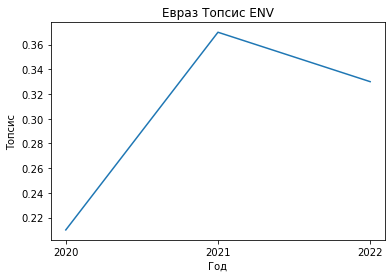

<Figure size 216x432 with 0 Axes>

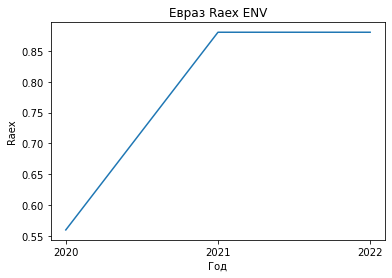

<Figure size 216x432 with 0 Axes>

In [980]:
plt.plot(y, e_e_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Евраз Топсис ENV') #Название
plt.figure(figsize=(3, 6))
plt.show()

plt.plot(y, e_e_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Евраз Raex ENV') #Название
plt.figure(figsize=(3, 6))
plt.show()

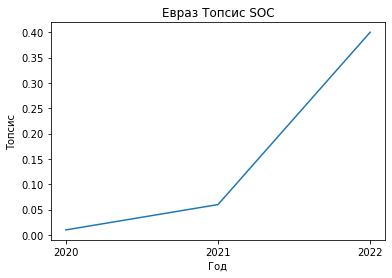

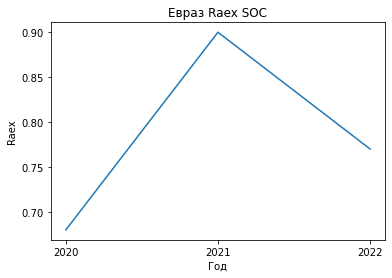

In [981]:
plt.plot(y, e_s_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Евраз Топсис SOC') #Название
plt.show()

plt.plot(y, e_s_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Евраз Raex SOC') #Название
plt.show()

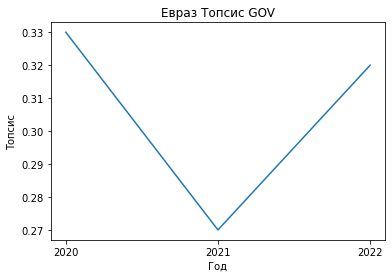

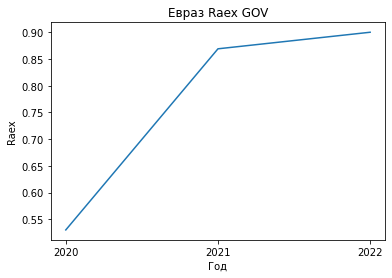

In [982]:
plt.plot(y, e_g_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Евраз Топсис GOV') #Название
plt.show()

plt.plot(y, e_g_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Евраз Raex GOV') #Название
plt.show()

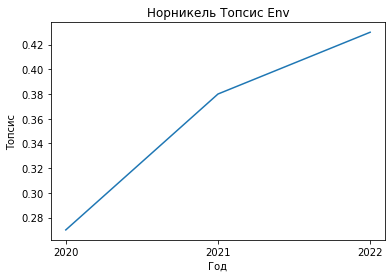

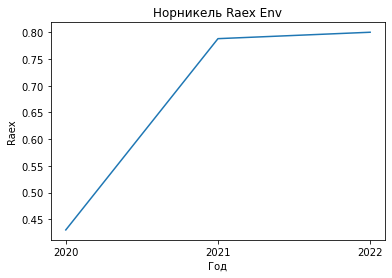

In [983]:
plt.plot(y, n_e_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Норникель Топсис Env') #Название
plt.show()

plt.plot(y, n_e_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Норникель Raex Env') #Название
plt.show()

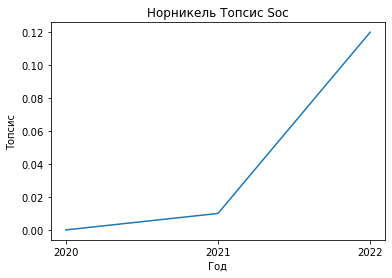

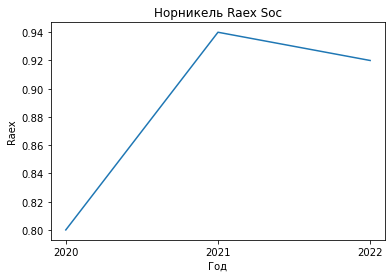

In [984]:
plt.plot(y, n_s_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Норникель Топсис Soc') #Название
plt.show()

plt.plot(y, n_s_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Норникель Raex Soc') #Название
plt.show()

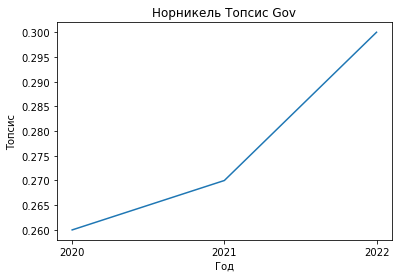

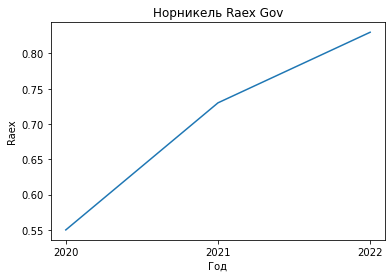

In [985]:
plt.plot(y, n_g_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Норникель Топсис Gov') #Название
plt.show()

plt.plot(y, n_g_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Норникель Raex Gov') #Название
plt.show()

In [986]:
l_e_t = [0.28, 0.43, 0.49]
l_e_r = [0.98, 0.944, 0.944]
l_s_t = [0.02, 0.02, 0.13]
l_s_r = [0.81, 0.85, 0.938]
l_g_t = [0.25, 0.26, 0.27]
l_g_r = [0.98, 0.988, 0.931]
r_e_t = [0.2, 0.39, 0.44]
r_e_r = [0.88, 0.7, 0.85]
r_s_t = [0.01, 0.13, 0.13]
r_s_r = [0.46, 0.63, 0.775]
r_g_t = [0.34, 0.34, 0.33]
r_g_r = [0.92, 0.688, 0.688]

In [950]:
l_e_t = [0.84, 0.84, 0.9]  #new 
l_e_r = [0.94, 0.929, 0.888]
l_s_t = [0.31, 0.216, 0.35]
l_s_r = [0.84, 0.923, 0.9]
l_g_t = [0.08, 0.24, 0.15]
l_g_r = [0.99, 0.935, 0.931]
r_e_t = [0.38, 0.78, 0.8]
r_e_r = [0.69, 0.826, 0.731]
r_s_t = [0.17, 0.74, 0.4]
r_s_r = [0.62, 0.74, 0.78]
r_g_t = [0.5, 0.72, 0.5]
r_g_r = [0.68, 0.774, 0.638]

In [987]:
v_e_t = [0.13, 0.29, 0.35]
v_e_r = [0.39, 0.544, 0.65]
v_s_t = [0.29, 0.44, 0.92]
v_s_r = [0.49, 0.688, 0.756]
v_g_t = [0.49, 0.26, 0.3]
v_g_r = [0.8, 0.9, 0.8]

In [951]:
v_e_t = [0.08, 0.38, 0.4] #new
v_e_r = [0.529, 0.697, 0.338]
v_s_t = [0.955, 0.97, 1]
v_s_r = [0.619, 0.742, 0.476]
v_g_t = [0.955, 0.27, 0.25]
v_g_r = [0.677, 0.464, 0.525]

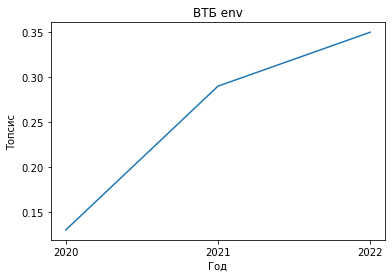

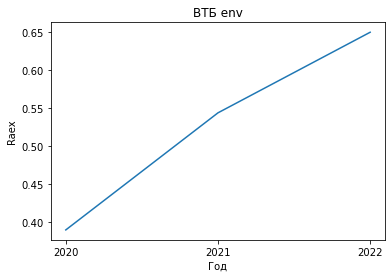

In [988]:
plt.plot(y, v_e_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('ВТБ env') #Название
plt.show()

plt.plot(y, v_e_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('ВТБ env') #Название
plt.show()

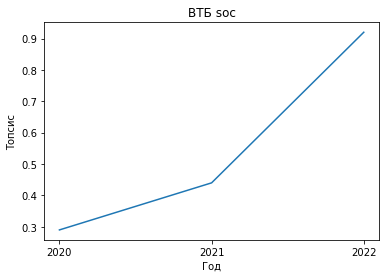

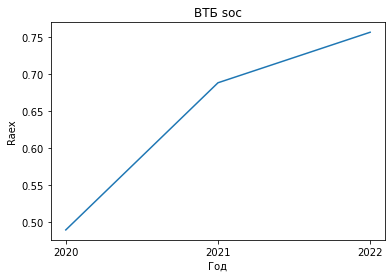

In [989]:
plt.plot(y, v_s_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('ВТБ soc') #Название
plt.show()

plt.plot(y, v_s_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('ВТБ soc') #Название
plt.show()

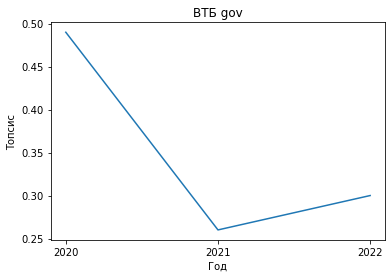

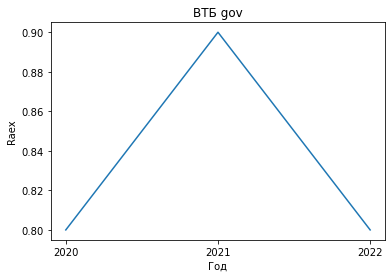

In [990]:
plt.plot(y, v_g_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('ВТБ gov') #Название
plt.show()

plt.plot(y, v_g_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('ВТБ gov') #Название
plt.show()

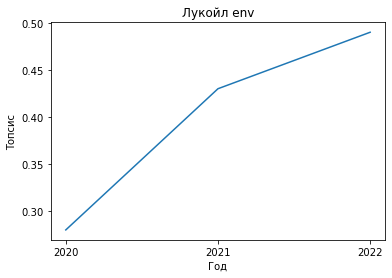

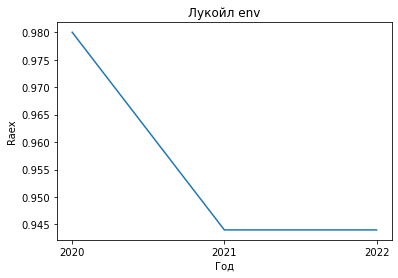

In [991]:
plt.plot(y, l_e_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Лукойл env') #Название
plt.show()

plt.plot(y, l_e_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Лукойл env') #Название
plt.show()

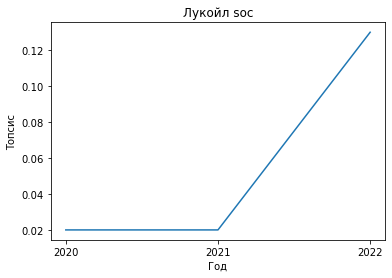

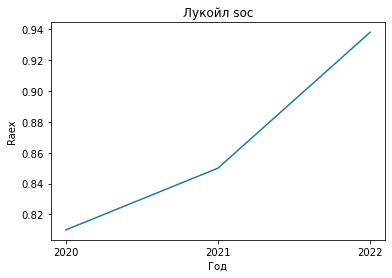

In [992]:
plt.plot(y, l_s_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Лукойл soc') #Название
plt.show()

plt.plot(y, l_s_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Лукойл soc') #Название
plt.show()

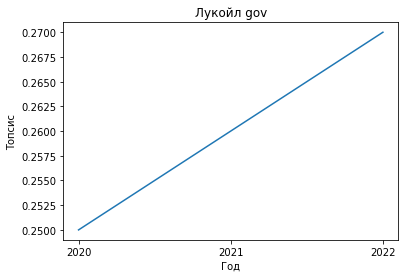

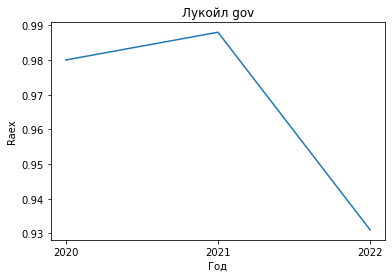

In [993]:
plt.plot(y, l_g_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Лукойл gov') #Название
plt.show()

plt.plot(y, l_g_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Лукойл gov') #Название
plt.show()

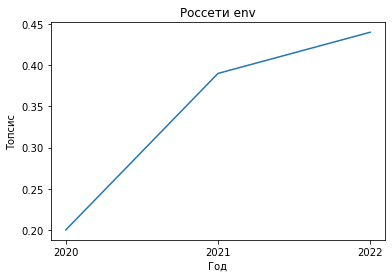

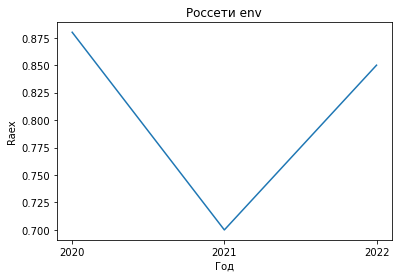

In [994]:
plt.plot(y, r_e_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Россети env') #Название
plt.show()

plt.plot(y, r_e_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Россети env') #Название
plt.show()

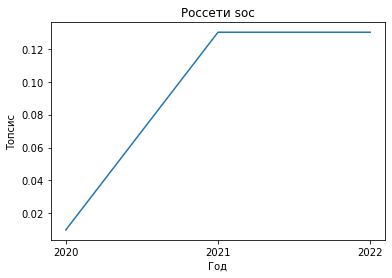

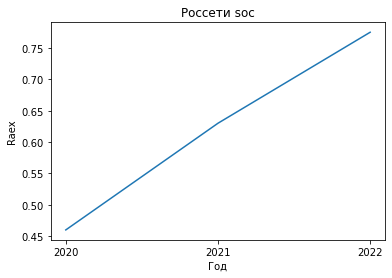

In [995]:
plt.plot(y, r_s_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Россети soc') #Название
plt.show()

plt.plot(y, r_s_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Россети soc') #Название
plt.show()

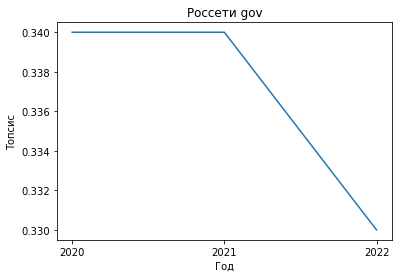

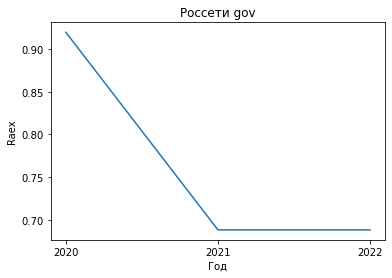

In [996]:
plt.plot(y, r_g_t)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Топсис') #Подпись для оси y
plt.title('Россети gov') #Название
plt.show()

plt.plot(y, r_g_r)
plt.xlabel('Год') #Подпись для оси х
plt.ylabel('Raex') #Подпись для оси y
plt.title('Россети gov') #Название
plt.show()

In [864]:
df_0

,company,env,social,gov,all_letters,on_letters,top_env,top_soc,top_gov,top,diff %,diff_point
index,,,,,,,,,,,,
117,X5 Retail Group,0.38,0.38,0.40,0.38,0.75,5,5,15,1,0.0,0.0
62,DeloitteCIS,0.07,0.40,0.46,0.37,0.59,95,1,4,2,0.0,0.0
670,Магнит,0.23,0.38,0.33,0.35,0.62,26,2,38,3,0.0,0.0
557,ООО «Леруа Мерлен Восток,0.19,0.38,0.37,0.35,0.61,43,3,21,4,0.0,0.0
669,Магнит,0.23,0.38,0.33,0.35,0.62,31,4,39,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
420,Госкорпорация «Росатом,0.15,0.13,0.14,0.14,0.28,59,108,99,109,0.0,0.0
685,Международный аэропорт Шереметьево,0.06,0.11,0.17,0.12,0.24,105,109,94,110,0.0,0.0
1000,ГК «Ростех,0.06,0.10,0.14,0.10,0.21,100,111,100,111,0.0,0.0


In [884]:
df_0 = pd.read_csv("results/topsis_2022.csv", index_col=0)
df_1 = pd.read_csv("results_old/TOPSIS_2022.csv", index_col=0)

In [885]:
df_0 = df_0.sort_values(by=['env'], ascending=False)
df_1 = df_1.sort_values(by=['env'], ascending=False)
df_0['top_env'] = [i for i in range(1, len(df_0)+1)]
df_1['top_env'] = [i for i in range(1, len(df_1)+1)]

In [886]:
df_0 = df_0.sort_values(by=['social'], ascending=False)
df_1 = df_1.sort_values(by=['social'], ascending=False)
df_0['top_soc'] = [i for i in range(1, len(df_0)+1)]
df_1['top_soc'] = [i for i in range(1, len(df_1)+1)]

In [887]:
df_0 = df_0.sort_values(by=['gov'], ascending=False)
df_1 = df_1.sort_values(by=['gov'], ascending=False)
df_0['top_gov'] = [i for i in range(1, len(df_0)+1)]
df_1['top_gov'] = [i for i in range(1, len(df_1)+1)]

In [888]:
df_0 = df_0.sort_values(by=['all_letters'], ascending=False)
df_1 = df_1.sort_values(by=['all_letters'], ascending=False)
df_0['top'] = [i for i in range(1, len(df_0)+1)]
df_1['top'] = [i for i in range(1, len(df_1)+1)]

In [889]:
df_0['diff %'] = (df_1['top'] - df_0['top'])/len(df_0)*100
df_0['diff_point'] = (df_1['top'] - df_0['top'])

In [890]:
df_0.head(30)

,company,env,social,gov,all_letters,on_letters,top_env,top_soc,top_gov,top,diff %,diff_point
index,,,,,,,,,,,,
117,X5 Retail Group,0.38,0.38,0.40,0.38,0.75,5,5,15,1,0.0,0.0
62,DeloitteCIS,0.07,0.40,0.46,0.37,0.59,95,1,4,2,0.0,0.0
670,Магнит,0.23,0.38,0.33,0.35,0.62,26,2,38,3,0.0,0.0
557,ООО «Леруа Мерлен Восток,0.19,0.38,0.37,0.35,0.61,43,3,21,4,0.0,0.0
669,Магнит,0.23,0.38,0.33,0.35,0.62,31,4,39,5,0.0,0.0
140,АО «Коммерческая недвижимость ФПК «Гарант-Инвест,0.35,0.34,0.29,0.34,0.64,7,9,59,6,0.0,0.0
462,ПАО «ИК РУСС-ИНВЕСТ,0.12,0.30,0.55,0.33,0.60,72,16,1,7,0.0,0.0
876,ПАО «Полиметалл,0.31,0.33,0.35,0.33,0.65,12,11,30,8,0.0,0.0
1409,Nordgold 2020 отчет,0.34,0.29,0.44,0.33,0.69,9,24,9,9,0.0,0.0


In [774]:
df_1 = df_1.sort_values(by=['top'], ascending=False)

In [580]:
diff = abs(df_0['diff %']).mean()
diff

44.44444444444445

In [775]:
df_0.to_csv('res_top_et/topsis_ranges_2022.csv')

In [120]:
df_2021 = pd.read_csv("res_top_et/topsis_2021.csv", index_col=0)

In [142]:
df_2021 = df_2021.sort_values(by=['all_letters'], ascending=False)

In [143]:
df_2021

,company,env,social,gov,all_letters,on_letters,top,raex
index,,,,,,,,
115,X5 Retail Group,0.45,0.46,0.30,0.40,0.75,1,0
158,«Агентство социальной информации,0.36,0.00,0.46,0.37,0.51,18,0
1134,АО «Сетевая компания,0.32,0.12,0.46,0.36,0.55,9,0
813,«Общероссийское отраслевое объединение работо...,0.32,0.03,0.46,0.36,0.50,21,0
1142,БФ «Система,0.49,0.12,0.24,0.36,0.52,16,0
...,...,...,...,...,...,...,...,...
17,"ПАО ""Метафракс Кемикалс""",0.18,0.03,0.35,0.26,0.37,71,0
9,АО «ИНК-Капитал,0.24,0.00,0.31,0.25,0.36,72,0
810,АО «ОХК Уралхим,0.26,0.06,0.30,0.25,0.38,64,0


In [144]:
ranges = [i for i in range(1, 75)]
df_2021['top'] = ranges
df_2021['raex'] = 0

In [145]:
df_2021.to_csv('res_top_et/topsis_ranges_2021.csv')

In [154]:
df_2022_0 = pd.read_csv("res_top_et/topsis_2022.csv", index_col=0)

In [159]:
df_2022_0 = df_2022.sort_values(by=['env'], ascending=False)

In [160]:
df_2022_0

,company,env,social,gov,all_letters,on_letters
index,,,,,,
1426,ПАО ММК 2022,0.75,0.48,0.48,0.53,0.83
1120,ПАО «Северсталь,0.69,0.54,0.40,0.55,0.78
1420,Акрон 2022,0.62,0.48,0.55,0.52,0.84
1,Lukoil,0.62,0.37,0.37,0.43,0.67
319,ПАО «ГМК «Норильский никель,0.57,0.43,0.38,0.45,0.69
1428,ЭЛ5-Энерго 2022,0.55,0.44,0.58,0.49,0.80
1425,Евраз 2022,0.55,0.47,0.38,0.47,0.70
5,Tatneft,0.51,0.37,0.68,0.46,0.76
4,Polyus,0.51,0.39,0.54,0.45,0.73


In [133]:
ranges = [i for i in range(1, 21)]
df_2022['top'] = ranges
df_2022['raex'] = 0

In [146]:
df_2022.to_csv('res_top_et/topsis_ranges_2022.csv')

In [149]:
df_2022 = pd.read_csv("TOPSIS_2022.csv", index_col=0)

In [151]:
df_2022 

,company,env,social,gov,all_letters,on_letters
index,,,,,,
0,Lenenergo,0.32,0.31,0.54,0.37,0.59
1,Lukoil,0.62,0.37,0.37,0.43,0.67
5,Phosagro,0.46,0.34,0.48,0.39,0.65
4,Polyus,0.51,0.39,0.54,0.45,0.73
3,Rosseti,0.51,0.43,0.38,0.44,0.67
5,Tatneft,0.51,0.37,0.68,0.46,0.76
812,«Общероссийское отраслевое объединение работо...,0.15,0.37,0.10,0.30,0.38
505,АО «Калининградский янтарный комбинат,0.31,0.17,0.08,0.19,0.30
1420,Акрон 2022,0.62,0.48,0.55,0.52,0.84


In [161]:
df_2022 = df_2022.sort_values(by=['env'], ascending=False)

In [162]:
df_2022

,company,env,social,gov,all_letters,on_letters
index,,,,,,
1426,ПАО ММК 2022,0.75,0.48,0.48,0.53,0.83
1120,ПАО «Северсталь,0.69,0.54,0.40,0.55,0.78
1420,Акрон 2022,0.62,0.48,0.55,0.52,0.84
1,Lukoil,0.62,0.37,0.37,0.43,0.67
319,ПАО «ГМК «Норильский никель,0.57,0.43,0.38,0.45,0.69
1428,ЭЛ5-Энерго 2022,0.55,0.44,0.58,0.49,0.80
1425,Евраз 2022,0.55,0.47,0.38,0.47,0.70
5,Tatneft,0.51,0.37,0.68,0.46,0.76
4,Polyus,0.51,0.39,0.54,0.45,0.73


In [944]:
df = pd.read_csv("res_top_et/topsis_ranges_2022.csv", index_col=0)

In [935]:
df = df.sort_values(by=['social'], ascending=False)

In [945]:
df.head(20)

,company,env,social,gov,all_letters,on_letters,top_env,top_soc,top_gov,top,diff %,diff_point
index,,,,,,,,,,,,
812,«Общероссийское отраслевое объединение работо...,0.47,0.22,0.45,0.44,0.60,4,10,4,1,85.0,17.0
505,АО «Калининградский янтарный комбинат,0.50,0.00,0.42,0.43,0.53,1,18,7,2,90.0,18.0
1427,Селигдар 2022,0.36,0.17,0.53,0.42,0.55,12,11,1,3,70.0,14.0
0,Lenenergo,0.39,0.32,0.47,0.42,0.58,10,8,3,4,60.0,12.0
1422,ВТБ 2022,0.35,0.92,0.30,0.41,0.56,13,1,16,5,35.0,7.0
6,ДОМ.РФ,0.42,0.57,0.28,0.39,0.52,8,2,17,6,40.0,8.0
1421,ВК 2022,0.35,0.00,0.47,0.38,0.45,14,19,2,7,60.0,12.0
5,Phosagro,0.41,0.29,0.38,0.38,0.51,9,9,8,8,35.0,7.0
1120,ПАО «Северсталь,0.44,0.39,0.26,0.37,0.47,6,6,19,9,-40.0,-8.0


In [ ]:
Фосагро - 2, env 5 soc 3 gov 2 (8, 9, 9, 8)
Полюс - 3 , env 1, soc 2, gov 14 (19, 11, 20, 10)
Татнефть - 4, env 13, soc 5, gov 6 (15, 19, 12, 6)
Эл-5 энерго - 8, енв 10 соц 20 гов 1 (18 18 7 9)
евраз - 9, 3б 16б 19 (17б 16б 5б 4)
норильск нокель - 10, (12б 12б 11)б (14б 7б 15б 15)
мкк - 15 (8б 9б 27)б (16б 2ь 16ь 20)